<a href="https://colab.research.google.com/github/kokojnr/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covidproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection
obtained the required data for the analysis. performed a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [ ]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Request for url
from urllib.request import Request, urlopen
res = Request(url = ' https://covid19.ncdc.gov.ng/', headers={'User-Agent': 'Mozilla/5.0'})



In [ ]:
# Read data as a string
html = urlopen(res).read()

In [ ]:
# Parse with beautiful soup
bs = BeautifulSoup(html, "html.parser")

In [ ]:
# Find all tables
tables = bs.find_all("table")

In [ ]:
# get all rows
rows = bs.find_all("tr")

In [ ]:
# create empty list of columns
column_names = []
# find all instances of "th" in the first row
header_cells = rows[0].find_all('th')

In [ ]:
# Extract text from header tags and replace newlines with space
for cell in header_cells:
    header = cell.text
    header = header.strip()
    header = header.replace("\n", " ")
    column_names.append(header)
    print(header)

States Affected
No. of Cases (Lab Confirmed)
No. of Cases (on admission)
No. Discharged
No. of Deaths


In [ ]:
data = []
for row in rows[1:]:
    cells = row.find_all("td")

    # create empty tuple
    dt = ()
    for cell in cells:
        dp = cell.text

        dp = dp.strip()
        dp = dp.replace("\n", " ")

        # add to tuple
        dt = dt + (dp, )
    data.append(dt)

In [ ]:
# store data in a tabular format
ncdc_df = pd.DataFrame(data, columns = column_names)

HDI Data
Website: https://globaldatalab.org/shdi/table/shdi/NGA/


In [ ]:
hdi_df = pd.read_csv('/content/drive/MyDrive/Nigeria-COVID-19-Data-Analysis-Using-Python-main/GDL-Subnational-HDI-data.csv')




### John Hopkins Data Repository
obtained data from the John Hopkins repository. links below.
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [ ]:
# read date from repo using the urls providede
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_df = pd.read_csv(url)


In [ ]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered_df = pd.read_csv(url)

In [ ]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death_df = pd.read_csv(url)


In [ ]:
# Saved external data to dataframe
external_df = pd.read_csv('/content/drive/MyDrive/Nigeria-COVID-19-Data-Analysis-Using-Python-main/covid_external.csv')
budget_df = pd.read_csv('/content/drive/MyDrive/Nigeria-COVID-19-Data-Analysis-Using-Python-main/Budget data.csv')
gdp_df = pd.read_csv('/content/drive/MyDrive/Nigeria-COVID-19-Data-Analysis-Using-Python-main/RealGDP.csv')


### View the data
Obtained basic information about the data using the `head()` and `info()` method.

In [ ]:
ncdc_df.info()
ncdc_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,286","1,143","102,372",771
1,FCT,"29,535",9,"29,277",249
2,Rivers,"18,112",-3,"17,960",155
3,Kaduna,"11,675",3,"11,583",89
4,Plateau,"10,365",4,"10,286",75


In [ ]:
hdi_df.info()
hdi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    38 non-null     object 
 1   Continent  38 non-null     object 
 2   ISO_Code   38 non-null     object 
 3   Level      38 non-null     object 
 4   GDLCODE    38 non-null     object 
 5   Region     38 non-null     object 
 6   1990       0 non-null      float64
 7   1991       0 non-null      float64
 8   1992       0 non-null      float64
 9   1993       0 non-null      float64
 10  1994       0 non-null      float64
 11  1995       0 non-null      float64
 12  1996       0 non-null      float64
 13  1997       0 non-null      float64
 14  1998       0 non-null      float64
 15  1999       0 non-null      float64
 16  2000       0 non-null      float64
 17  2001       0 non-null      float64
 18  2002       0 non-null      float64
 19  2003       38 non-null     float64
 20  2004       3

,Country,Continent,ISO_Code,Level,GDLCODE,Region,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Nigeria,Africa,NGA,National,NGAt,Total,NaN,NaN,NaN,NaN,...,0.499,0.506,0.512,0.516,0.521,0.526,0.531,0.538,0.535,0.535
1,Nigeria,Africa,NGA,Subnat,NGAr122,Abia,NaN,NaN,NaN,NaN,...,0.573,0.581,0.594,0.604,0.615,0.627,0.640,0.648,0.645,0.644
2,Nigeria,Africa,NGA,Subnat,NGAr137,Abuja FCT,NaN,NaN,NaN,NaN,...,0.649,0.664,0.660,0.654,0.649,0.645,0.641,0.649,0.646,0.646
3,Nigeria,Africa,NGA,Subnat,NGAr108,Adamawa,NaN,NaN,NaN,NaN,...,0.480,0.498,0.497,0.494,0.490,0.486,0.481,0.487,0.485,0.485
4,Nigeria,Africa,NGA,Subnat,NGAr101,Akwa Ibom,NaN,NaN,NaN,NaN,...,0.591,0.607,0.607,0.605,0.604,0.604,0.603,0.611,0.608,0.608


In [ ]:
confirmed_df.info()
confirmed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
recovered_df.info()
recovered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
death_df.info()
death_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [ ]:
external_df.info()
external_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [ ]:
budget_df.info()
budget_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [ ]:
gdp_df.info()
gdp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [ ]:
gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


### Data Cleaning and Preparation


In [ ]:
ng_index  = confirmed_df[confirmed_df['Country/Region'] == 'Nigeria'].index
ng_index

Int64Index([206], dtype='int64')

In [ ]:
rec_index  = recovered_df[recovered_df['Country/Region'] == 'Nigeria'].index
rec_index

Int64Index([191], dtype='int64')

In [ ]:
date = confirmed_df.columns.values.tolist()
ng_confirmed = confirmed_df.iloc[206]
ng_recovered = recovered_df.iloc[191]
ng_death = death_df.iloc[206]

In [ ]:
data = {'Date': date[4:], 'Confirmed': ng_confirmed[4:], 'Recovered':ng_recovered[4:], 'Death': ng_death[4:]}

In [ ]:
nig_df  = pd.DataFrame(data = data)

In [ ]:
nig_df.head()

,Date,Confirmed,Recovered,Death
1/22/20,1/22/20,0,0,0
1/23/20,1/23/20,0,0,0
1/24/20,1/24/20,0,0,0
1/25/20,1/25/20,0,0,0
1/26/20,1/26/20,0,0,0


Clean the scraped data

In [ ]:
ncdc_df['No. Discharged'] = ncdc_df['No. Discharged'].str.replace(',','')
ncdc_df['No. of Cases (on admission)'] = ncdc_df['No. of Cases (on admission)'].str.replace(',','')
ncdc_df['No. of Cases (Lab Confirmed)'] = ncdc_df['No. of Cases (Lab Confirmed)'].str.replace(',','')

In [ ]:
ncdc_df['No. of Deaths'] = ncdc_df['No. of Deaths'].astype(float)
ncdc_df['No. Discharged'] = ncdc_df['No. Discharged'].astype(float)
ncdc_df['No. of Cases (on admission)'] = ncdc_df['No. of Cases (on admission)'].astype(float)
ncdc_df['No. of Cases (Lab Confirmed)'] = ncdc_df['No. of Cases (Lab Confirmed)'].astype(float)

In [ ]:
hdi_df = hdi_df[['Region','2019','2020', '2021']]
hdi_df.head()


,Region,2019,2020,2021
0,Total,0.538,0.535,0.535
1,Abia,0.648,0.645,0.644
2,Abuja FCT,0.649,0.646,0.646
3,Adamawa,0.487,0.485,0.485
4,Akwa Ibom,0.611,0.608,0.608


In [ ]:
nig_df['Date'] = pd.to_datetime(nig_df['Date'])
nig_df['Confirmed'] = nig_df['Confirmed'].astype(int)
nig_df['Recovered'] = nig_df['Recovered'].astype(int)
nig_df['Death'] = nig_df['Death'].astype(int)


### Analysis


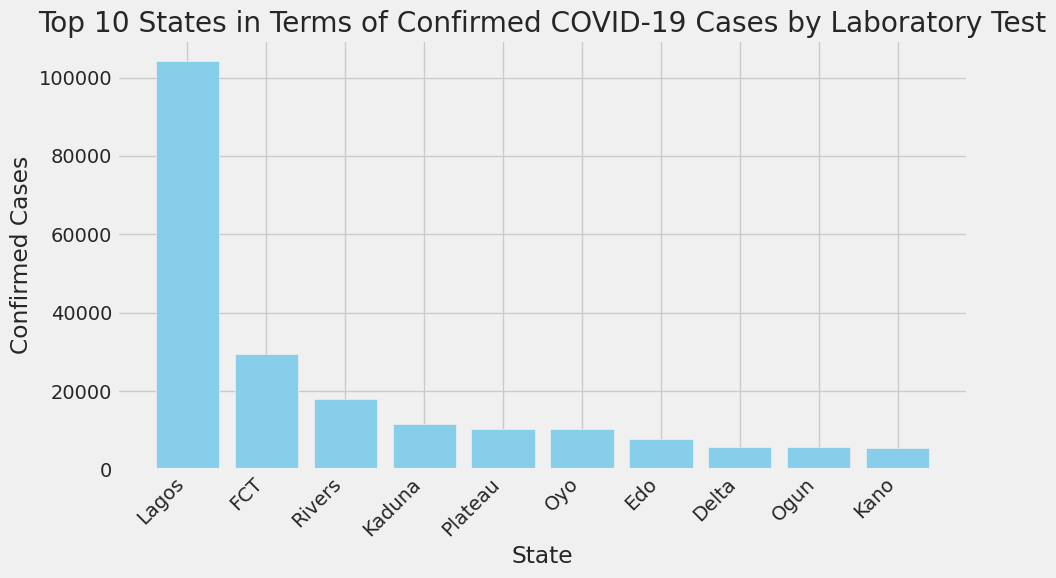

In [ ]:
# Sort the DataFrame by ConfirmedCases in descending order
df = ncdc_df.sort_values(by='No. of Cases (Lab Confirmed)', ascending=False)

# Select the top 10 states
top_10_states = df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['States Affected'], top_10_states['No. of Cases (Lab Confirmed)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 States in Terms of Confirmed COVID-19 Cases by Laboratory Test')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

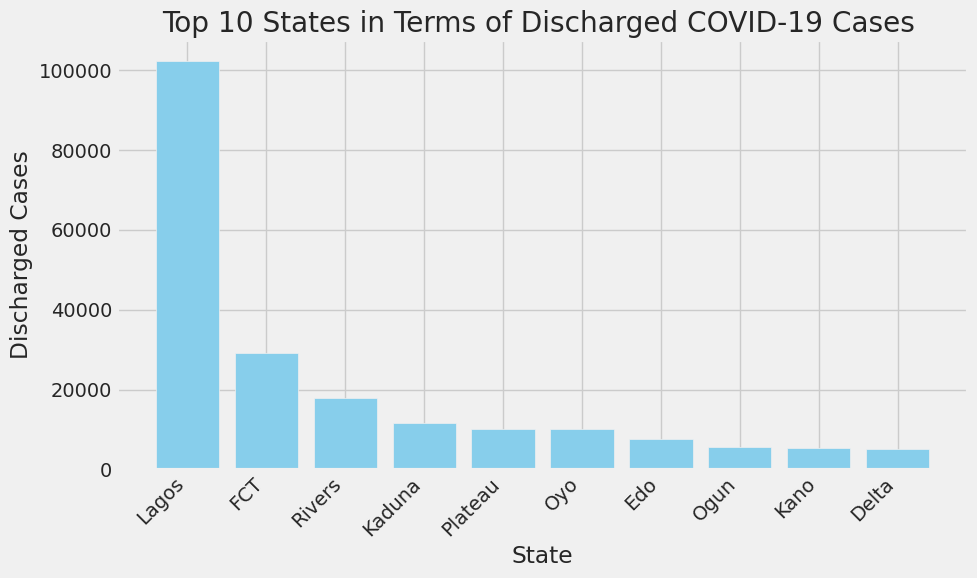

In [ ]:
df = ncdc_df.sort_values(by='No. Discharged', ascending=False)

# Select the top 10 states
top_10_states = df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['States Affected'], top_10_states['No. Discharged'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Discharged Cases')
plt.title('Top 10 States in Terms of Discharged COVID-19 Cases ')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

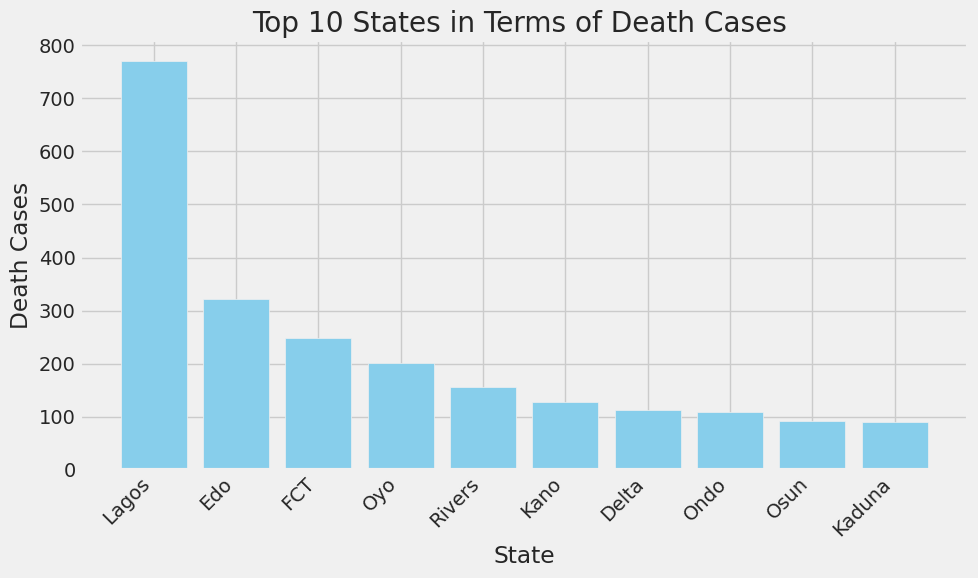

In [ ]:
df = ncdc_df.sort_values(by='No. of Deaths', ascending=False)

# Select the top 10 states
top_10_states = df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['States Affected'], top_10_states['No. of Deaths'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Death Cases')
plt.title('Top 10 States in Terms of Death Cases ')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

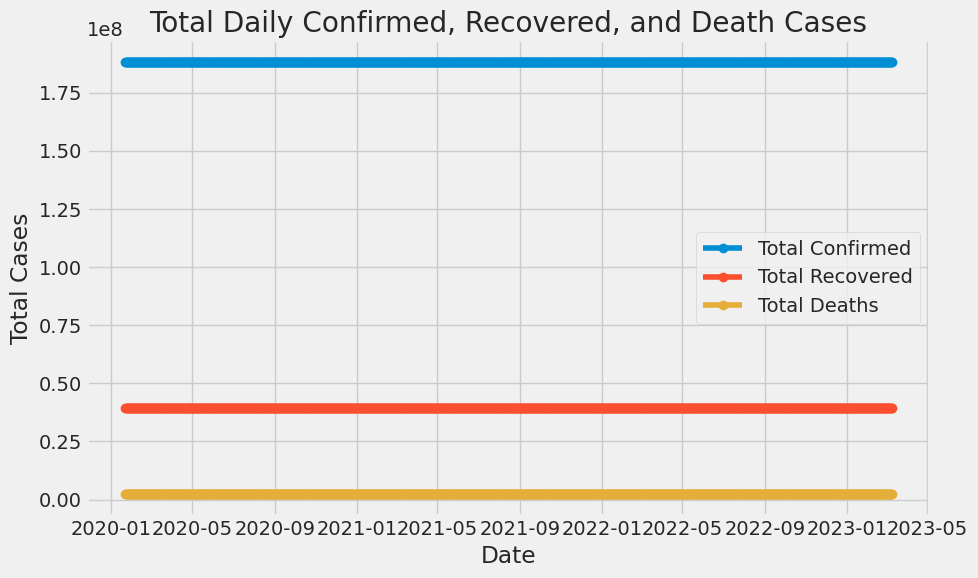

In [ ]:
# Calculate total daily cases
df = nig_df.copy()
df['Total Confirmed'] = df['Confirmed'].sum()
df['Total Recovered'] = df['Recovered'].sum()
df['Total Deaths'] = df['Death'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Total Confirmed'], label='Total Confirmed', marker='o')
plt.plot(df['Date'], df['Total Recovered'], label='Total Recovered', marker='o')
plt.plot(df['Date'], df['Total Deaths'], label='Total Deaths', marker='o')

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total Daily Confirmed, Recovered, and Death Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

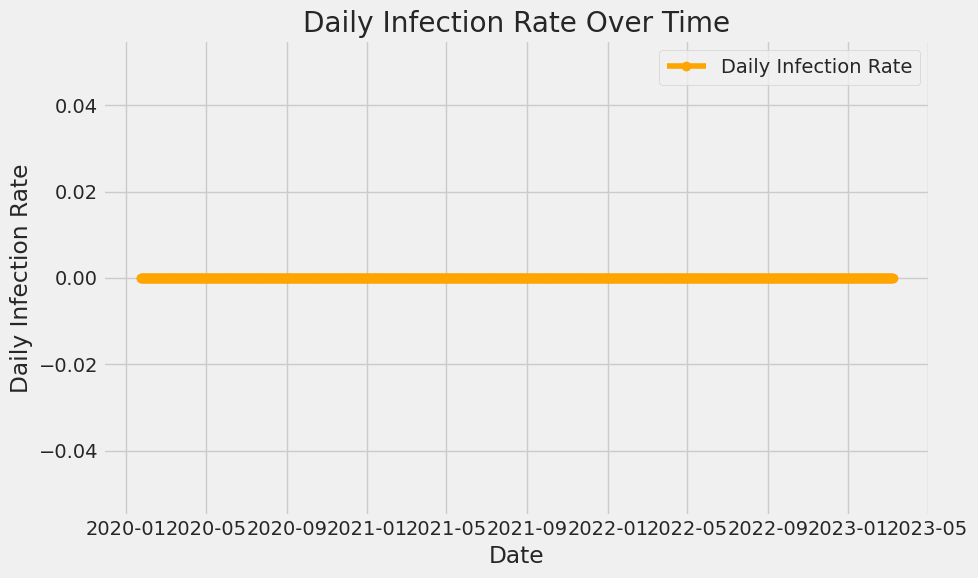

In [ ]:
# Calculate daily infection rate
df['DailyInfectionRate'] = df['Total Confirmed'].diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['DailyInfectionRate'], label='Daily Infection Rate', marker='o', color='orange')

plt.xlabel('Date')
plt.ylabel('Daily Infection Rate')
plt.title('Daily Infection Rate Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Find the date with the maximum infection rate
max_infection_date = df.loc[df['DailyInfectionRate'].idxmax(), 'Date']
max_infection_rate = df['DailyInfectionRate'].max()

# Print the result
print(f"Maximum Infection Rate: {max_infection_rate} on {max_infection_date}")


Maximum Infection Rate: 0.0 on 2020-01-23 00:00:00


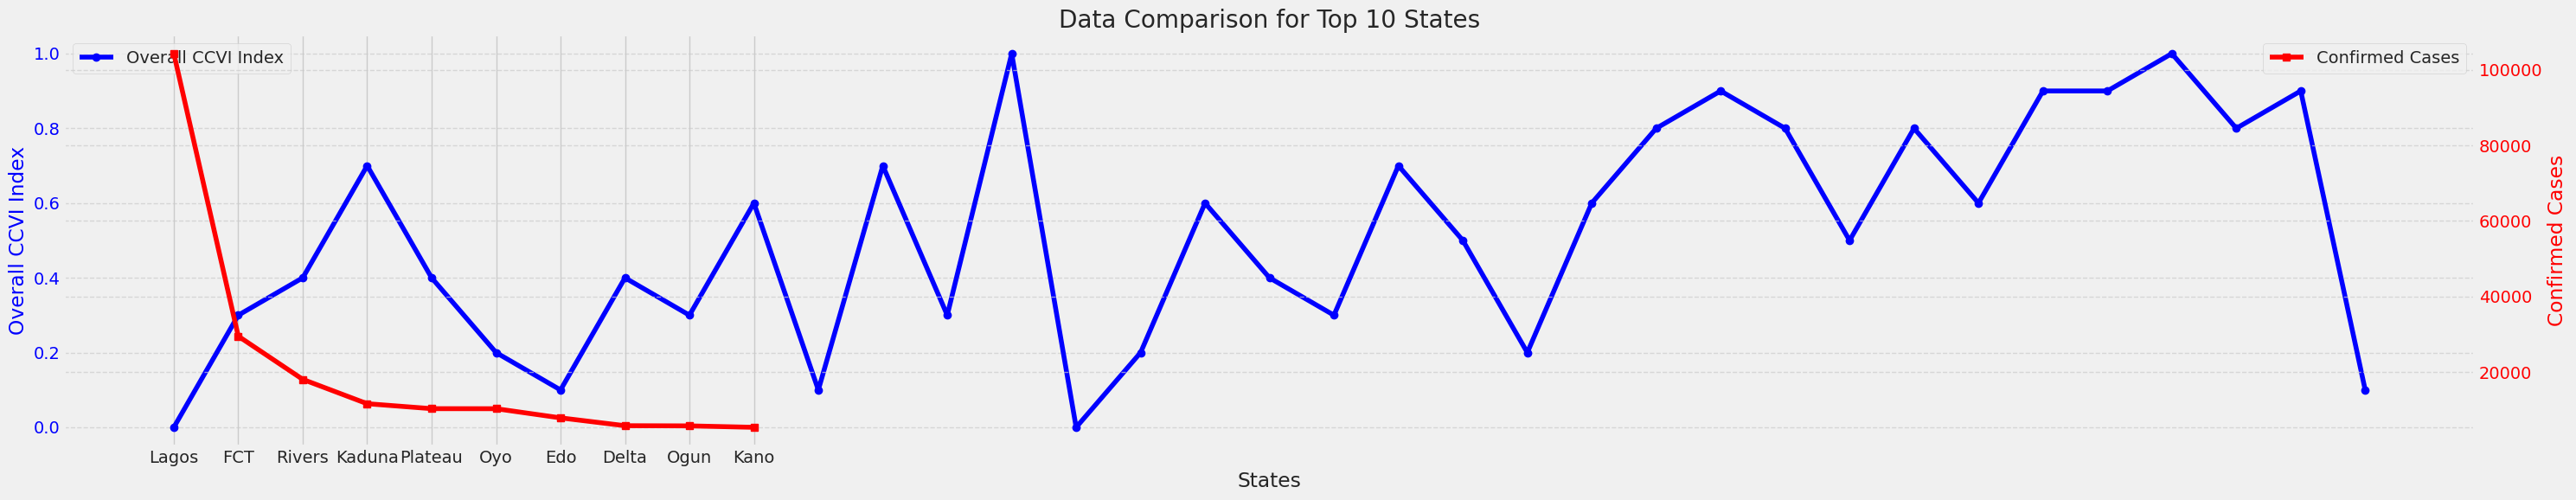

In [ ]:
# Sort the DataFrame by Confirmed Cases in descending order
df = ncdc_df.sort_values(by='No. of Cases (Lab Confirmed)', ascending=False)
df['states'] = df['States Affected']

# Select the top 10 states
top_10_states = df.head(10)
merged_df = pd.merge(df, external_df, on='states', how='inner')
import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(30,6))

# Plotting variable from merged_df
ax1.plot(merged_df['states'], merged_df['Overall CCVI Index'], 'b-', label='Overall CCVI Index', marker='o')
ax1.set_xlabel('States')
ax1.set_ylabel('Overall CCVI Index', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')
ax1.set_xticks(top_10_states['states'])
#ax1.tick_params(axis='x', rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Creating a second y-axis for the second variable (e.g., confirmed_cases)
ax2 = ax1.twinx()
ax2.plot(top_10_states['states'], top_10_states['No. of Cases (Lab Confirmed)'], 'r-', label='Confirmed Cases', marker='s')
ax2.set_ylabel('Confirmed Cases', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')
ax2.set_xticks(top_10_states['states'])
#ax2.tick_params(axis='x', rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Title
plt.title('Data Comparison for Top 10 States')
plt.tight_layout()
# Show the plot
plt.show()


TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

Text(0, 0.5, 'Confirmed Cases')

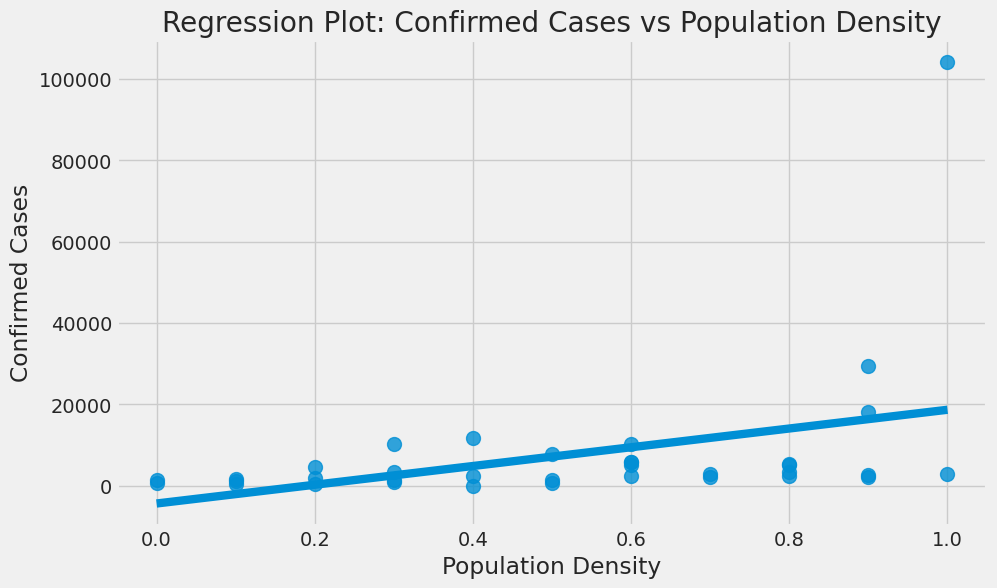

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Population Density', y='No. of Cases (Lab Confirmed)', data=merged_df, scatter_kws={'s': 100}, ci=None)

# Adding titles and labels
plt.title('Regression Plot: Confirmed Cases vs Population Density')
plt.xlabel('Population Density')
plt.ylabel('Confirmed Cases')


Text(0, 0.5, 'Confirmed Cases')

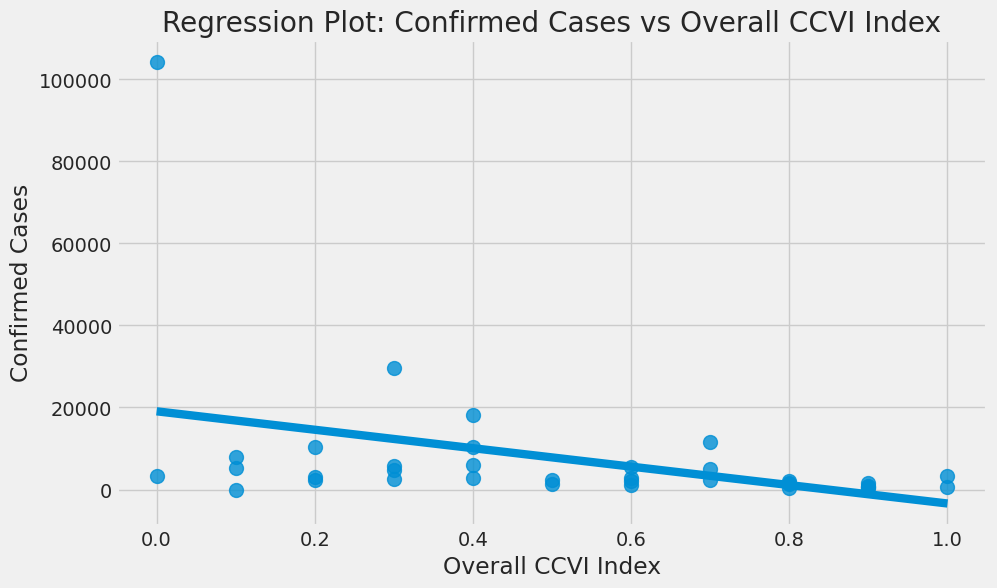

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Overall CCVI Index', y='No. of Cases (Lab Confirmed)', data=merged_df, scatter_kws={'s': 100}, ci=None)

# Adding titles and labels
plt.title('Regression Plot: Confirmed Cases vs Overall CCVI Index')
plt.xlabel('Overall CCVI Index')
plt.ylabel('Confirmed Cases')


Text(0, 0.5, 'Deaths')

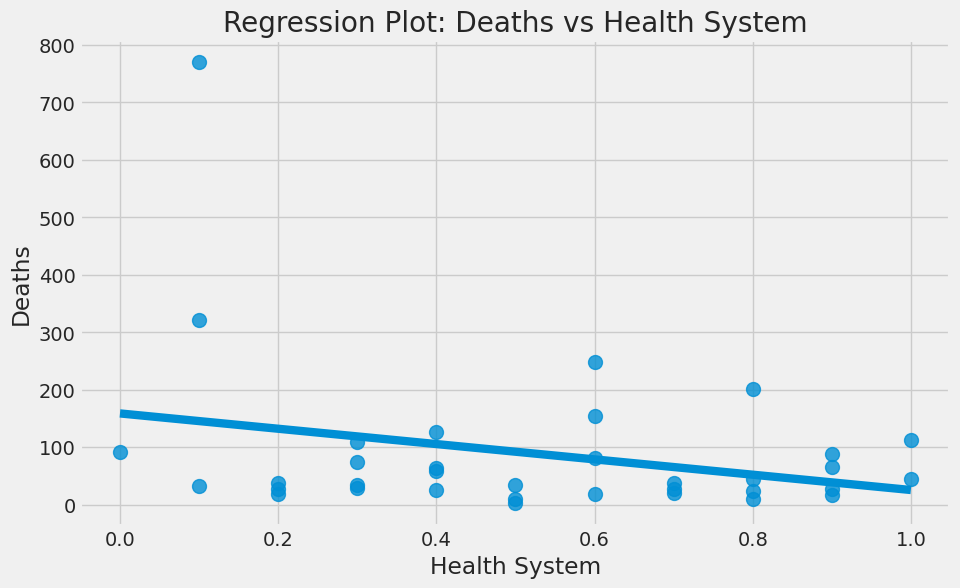

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Health System', y='No. of Deaths', data=merged_df, scatter_kws={'s': 100}, ci=None)

# Adding titles and labels
plt.title('Regression Plot: Deaths vs Health System')
plt.xlabel('Health System')
plt.ylabel('Deaths')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   States Affected               35 non-null     object 
 1   No. of Cases (Lab Confirmed)  35 non-null     float64
 2   No. of Cases (on admission)   35 non-null     float64
 3   No. Discharged                35 non-null     float64
 4   No. of Deaths                 35 non-null     float64
 5   states                        35 non-null     object 
 6   region                        35 non-null     object 
 7   Population                    35 non-null     int64  
 8   Overall CCVI Index            35 non-null     float64
 9   Age                           35 non-null     float64
 10  Epidemiological               35 non-null     float64
 11  Fragility                     35 non-null     float64
 12  Health System                 35 non-null     float64
 13  Populat

Text(0, 0.5, 'Confirmed Cases')

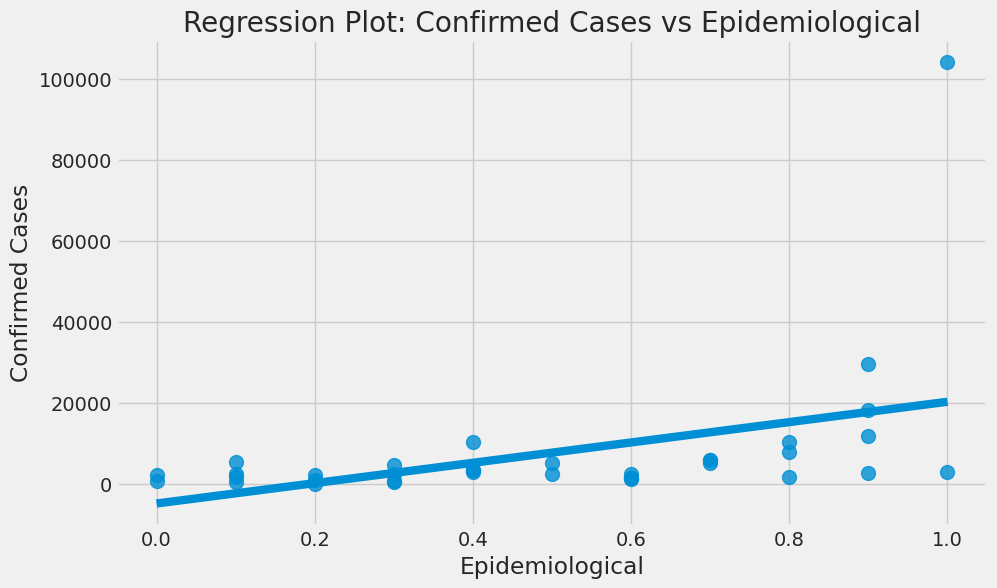

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Epidemiological', y='No. of Cases (Lab Confirmed)', data=merged_df, scatter_kws={'s': 100}, ci=None)

# Adding titles and labels
plt.title('Regression Plot: Confirmed Cases vs Epidemiological')
plt.xlabel('Epidemiological')
plt.ylabel('Confirmed Cases')


Text(0, 0.5, 'Recovered')

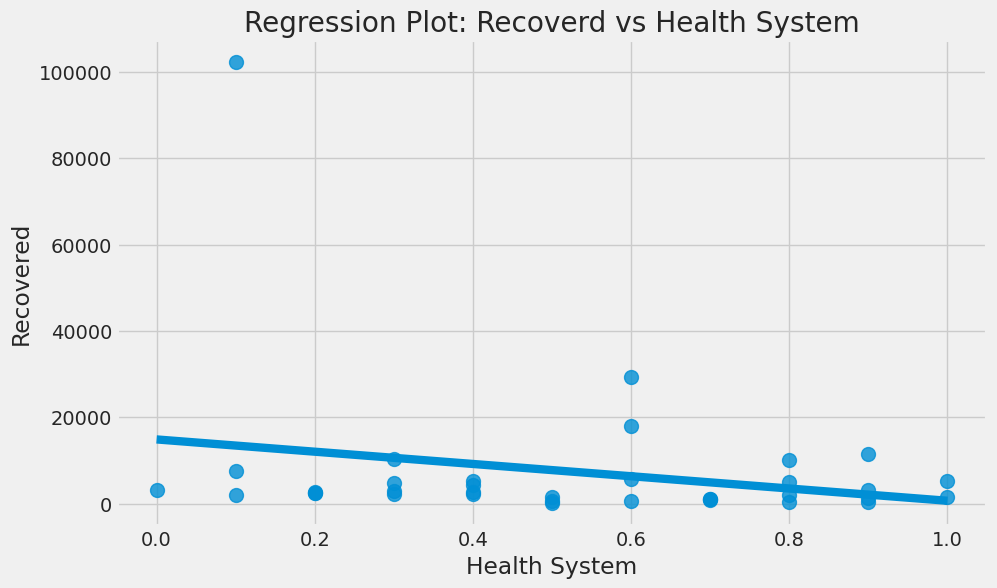

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Health System', y='No. Discharged', data=merged_df, scatter_kws={'s': 100}, ci=None)

# Adding titles and labels
plt.title('Regression Plot: Recoverd vs Health System')
plt.xlabel('Health System')
plt.ylabel('Recovered')

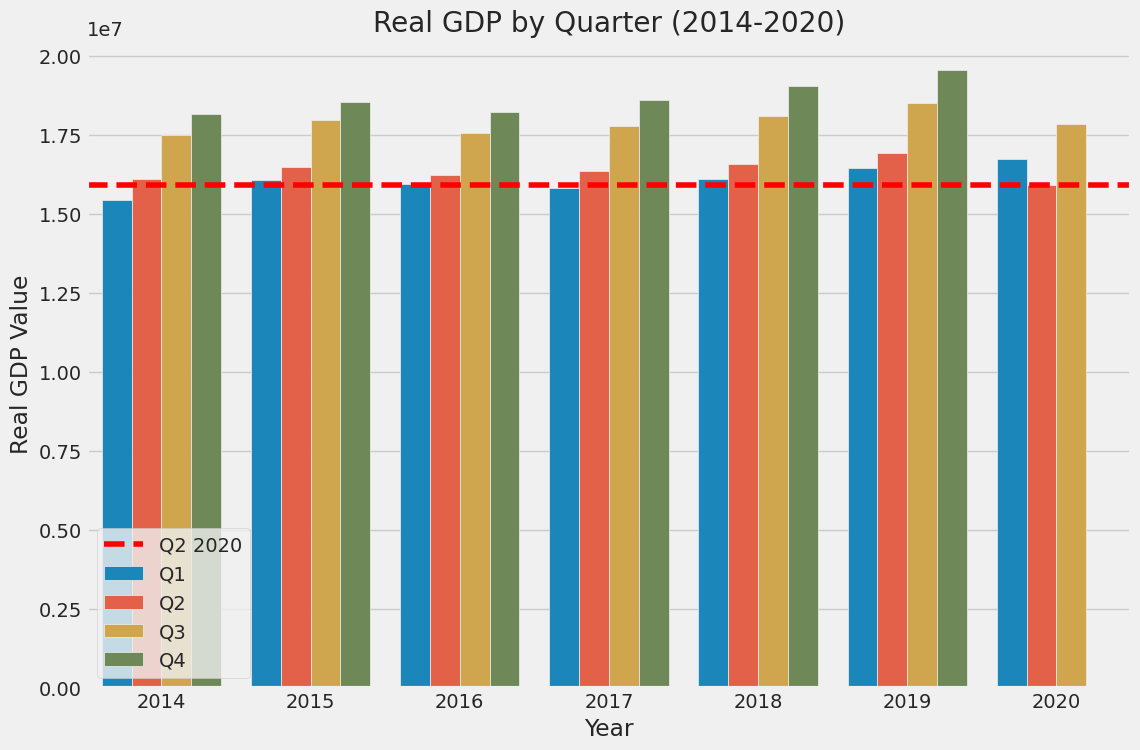

In [ ]:

# Use pandas.melt to reshape the DataFrame for plotting
melted_df = pd.melt(gdp_df, id_vars=['Year'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'], var_name='Quarter', value_name='GDP Value')

# Plotting using Seaborn barplot with subplots for each quarter
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='GDP Value',hue = 'Quarter', data=melted_df)

# Draw a horizontal line at the value of Q2 2020
plt.axhline(y=melted_df.loc[(melted_df['Year'] == 2020) & (melted_df['Quarter'] == 'Q2'), 'GDP Value'].values[0],
            color='red', linestyle='--', label='Q2 2020')

# Set legend to lower left
plt.legend(loc='lower left')

# Adding titles and labels
plt.title('Real GDP by Quarter (2014-2020)')
plt.xlabel('Year')
plt.ylabel('Real GDP Value')

plt.show()

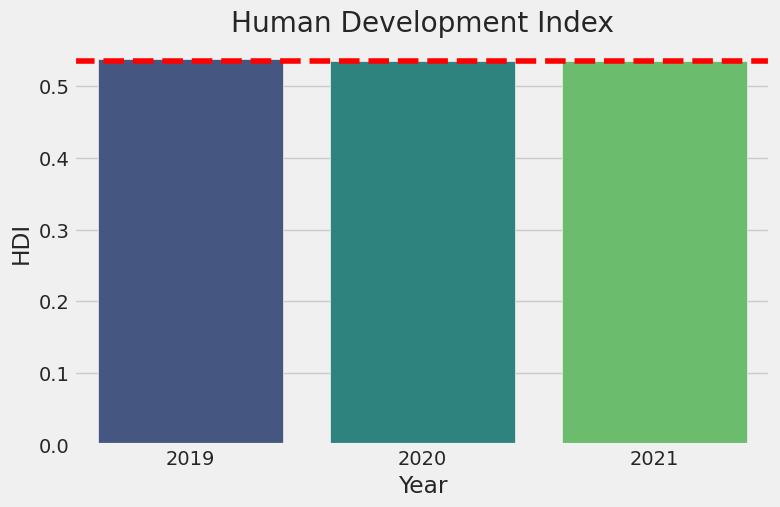

In [ ]:
total_hdi =  hdi_df.iloc[0].copy()
first_row_df = pd.DataFrame(total_hdi).transpose()

# Plotting using Seaborn barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=first_row_df, palette="viridis")

# Draw a horizontal line at the year 2020
plt.axhline(y=first_row_df['2020'].values[0], color='red', linestyle='--', label=' HDI 2020')

# Adding titles and labels
plt.title('Human Development Index')
plt.xlabel('Year')
plt.ylabel('HDI')

plt.show()

In [ ]:
hdi = hdi_df.tail(-1)
hdi['states'] = hdi['Region']
hdi = hdi.sort_values(by='2020', ascending = True)
# Merge DataFrames based on the common column 'states'
combined_df = pd.merge(hdi.head(10), budget_df, on='states', how='inner')
combined_df.head()


,Region,2019,2020,2021,states,Initial_budget (Bn),Revised_budget (Bn)
0,Kebbi,0.337,0.335,0.335,Kebbi,138.00,99.6
1,Sokoto,0.338,0.336,0.336,Sokoto,202.40,153.0
2,Yobe,0.366,0.364,0.363,Yobe,108.00,86.0
3,Gombe,0.410,0.408,0.408,Gombe,130.83,107.4
4,Jigawa,0.412,0.410,0.409,Jigawa,152.92,124.0


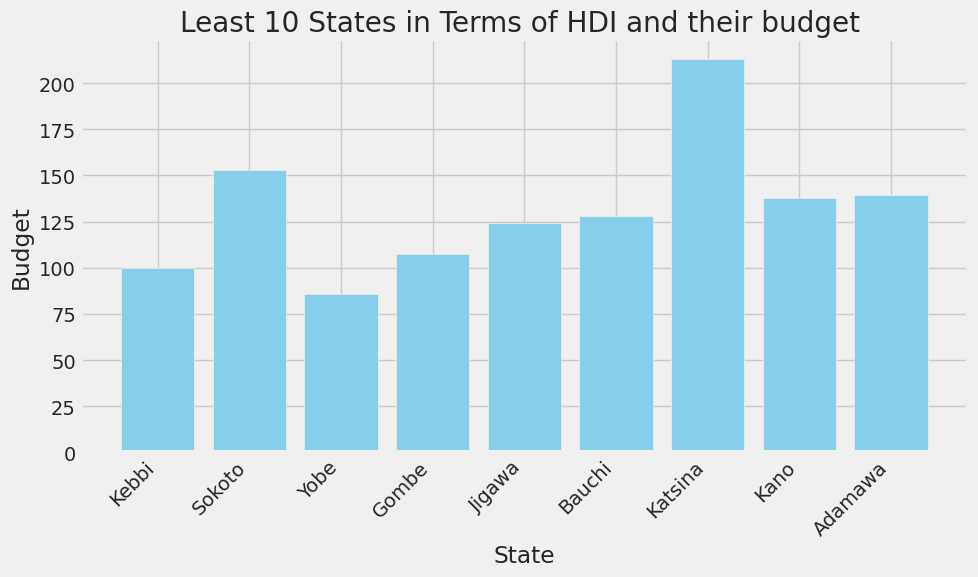

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(combined_df['states'], combined_df['Revised_budget (Bn)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Budget')
plt.title('Least 10 States in Terms of HDI and their budget ')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

In [ ]:
least_ten = external_df.sort_values(by='Health System', ascending = True)
combined = pd.merge(least_ten.head(10), budget_df, on='states', how='inner')
combined.head()


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Osun,South West,5252000,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06,119.6,82.2
1,Ebonyi,South South,3192000,0.6,1.0,0.0,0.6,0.1,0.7,0.3,0.6,1.00,178.4,131.8
2,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09,179.2,128.8
3,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,1680.0,920.5
4,Anambra,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08,137.1,112.8


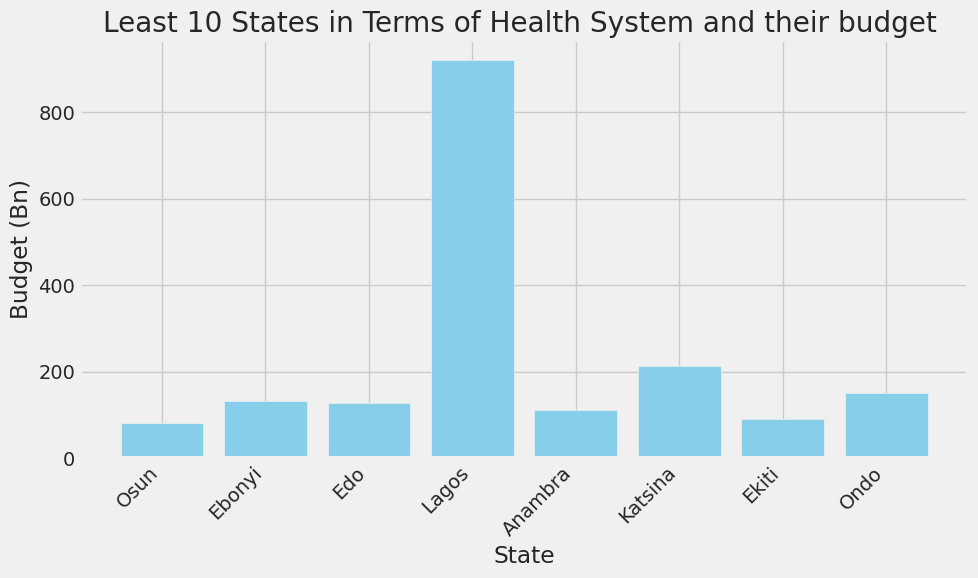

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(combined['states'], combined['Revised_budget (Bn)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Budget (Bn)')
plt.title('Least 10 States in Terms of Health System and their budget ')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

In [ ]:
last_ten = external_df.sort_values(by='Socio-Economic', ascending = True)
joint = pd.merge(last_ten.head(10), budget_df, on='states', how='inner')
joint.head()


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Anambra,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08,137.1,112.8
1,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,449.9,280.0
2,Ekiti,South West,3593000,0.3,0.8,0.3,0.5,0.2,0.8,0.1,0.4,1.03,124.5,91.1
3,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,530.8,300.4
4,Osun,South West,5252000,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06,119.6,82.2


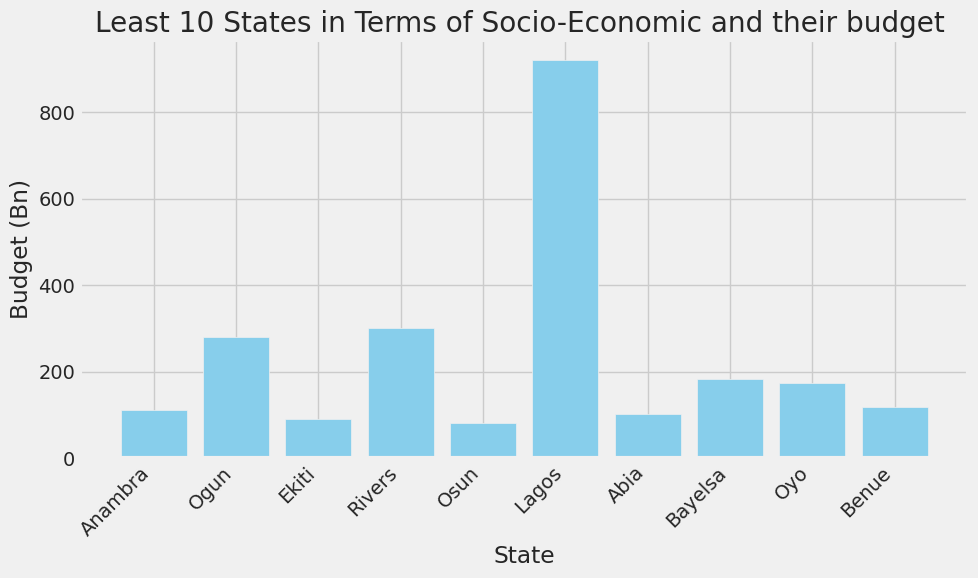

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(joint['states'], joint['Revised_budget (Bn)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Budget (Bn)')
plt.title('Least 10 States in Terms of Socio-Economic and their budget ')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

In [ ]:
top_ten = external_df.sort_values(by='Socio-Economic', ascending = False)
joint = pd.merge(top_ten.head(10), budget_df, on='states', how='inner')
joint.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Zamfara,North West,4974000,0.9,0.2,0.1,0.7,0.8,0.2,1.0,0.9,0.87,188.50,127.3
1,Sokoto,North West,5612000,0.9,0.3,0.2,0.4,0.7,0.3,1.0,1.0,0.89,202.40,153.0
2,Kebbi,North West,4968000,0.8,0.2,0.3,0.4,0.9,0.1,0.9,0.9,0.85,138.00,99.6
3,Jigawa,North West,6435000,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92,152.92,124.0
4,Katsina,North West,8713000,0.7,0.1,0.1,0.3,0.2,0.6,0.9,0.8,0.85,244.00,213.0


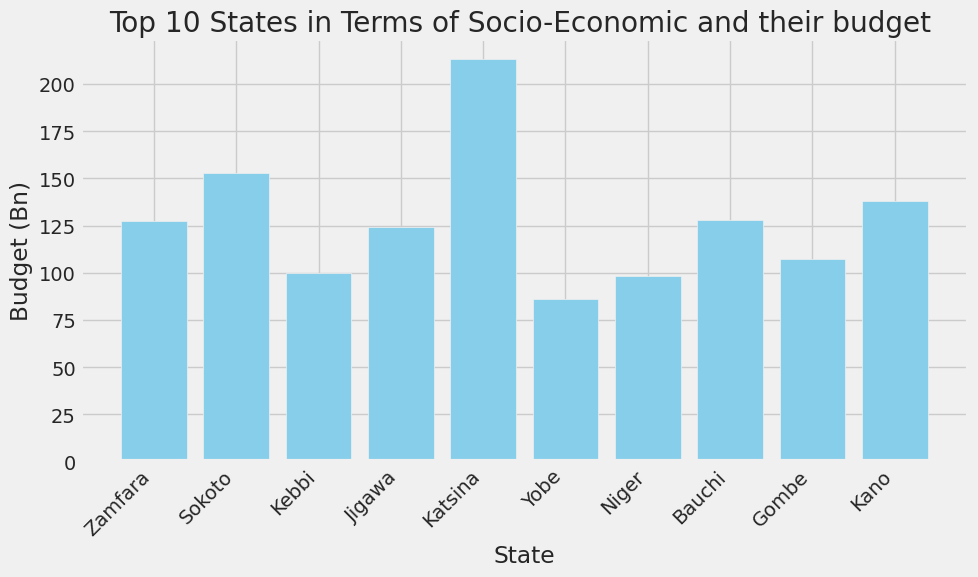

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(joint['states'], joint['Revised_budget (Bn)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Budget (Bn)')
plt.title('Top 10 States in Terms of Socio-Economic and their budget ')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

In [ ]:
nig_df.head()

,Date,Confirmed,Recovered,Death
1/22/20,2020-01-22,0,0,0
1/23/20,2020-01-23,0,0,0
1/24/20,2020-01-24,0,0,0
1/25/20,2020-01-25,0,0,0
1/26/20,2020-01-26,0,0,0


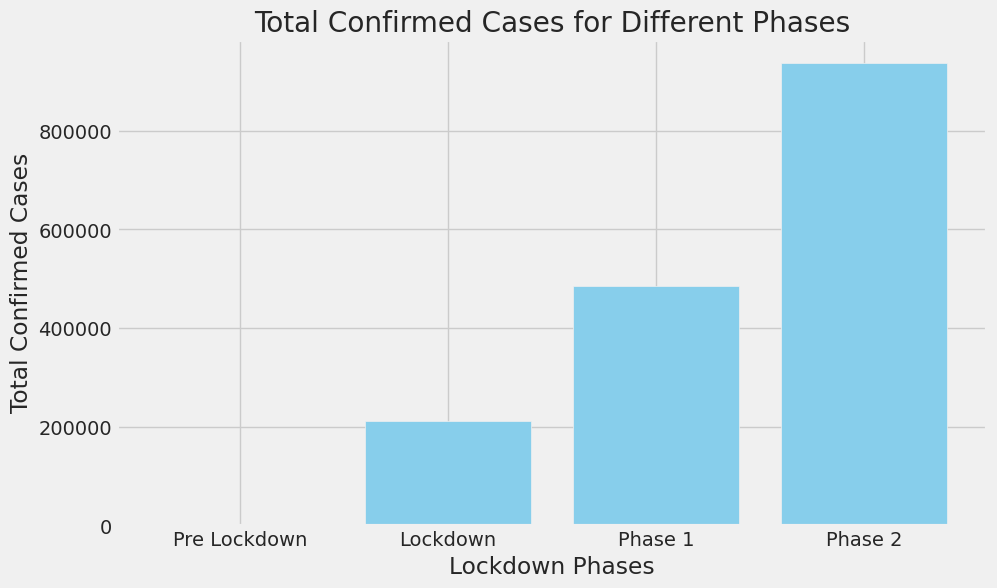

In [ ]:
# Define date ranges
ranges = [
    ('2020-01-01', '2020-03-29'),
    ('2020-03-30', '2020-06-1'),
    ('2020-06-02', '2020-06-29'),
    ('2020-06-30', '2020-07-27'),
]

# Convert date ranges to datetime objects
date_ranges = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in ranges]


# Create bins and labels
bins = [pd.to_datetime(start) for start, _ in date_ranges] + [pd.to_datetime('2020-07-28')]  # Add an upper bound for the last bin
labels = ['Pre Lockdown', 'Lockdown', 'Phase 1', 'Phase 2']

# Cut the data into bins and assign labels
nig_df['Phase'] = pd.cut(nig_df['Date'], bins=bins, labels=labels, right=False)

# Calculate total confirmed cases for each phase
plot_df = nig_df.groupby('Phase')['Confirmed'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(plot_df['Phase'], plot_df['Confirmed'], color='skyblue')
plt.title('Total Confirmed Cases for Different Phases')
plt.xlabel('Lockdown Phases')
plt.ylabel('Total Confirmed Cases')
plt.show()